In [1]:
import numpy as np
import seaborn as ChaChing
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model


In [2]:
name = 'housing.csv'
dato = pd.read_csv(name)
df = pd.DataFrame(dato)

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
training_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

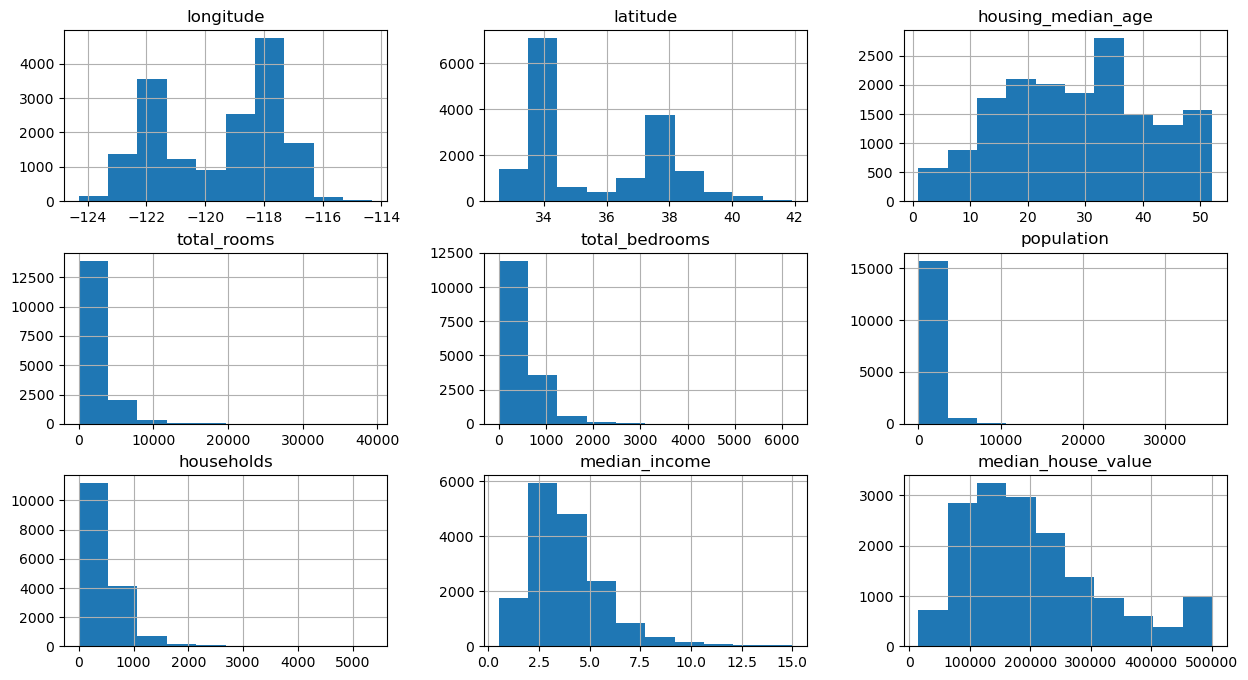

In [10]:
training_data.hist(figsize=(15,8))

Someone should come up with insights or predictions based off Histograms


In [11]:
training_data['total_rooms'] = np.log(training_data['total_rooms']+1)
training_data['total_bedrooms'] = np.log(training_data['total_bedrooms']+1)
training_data['population'] = np.log(training_data['population']+1)
training_data['households'] = np.log(training_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

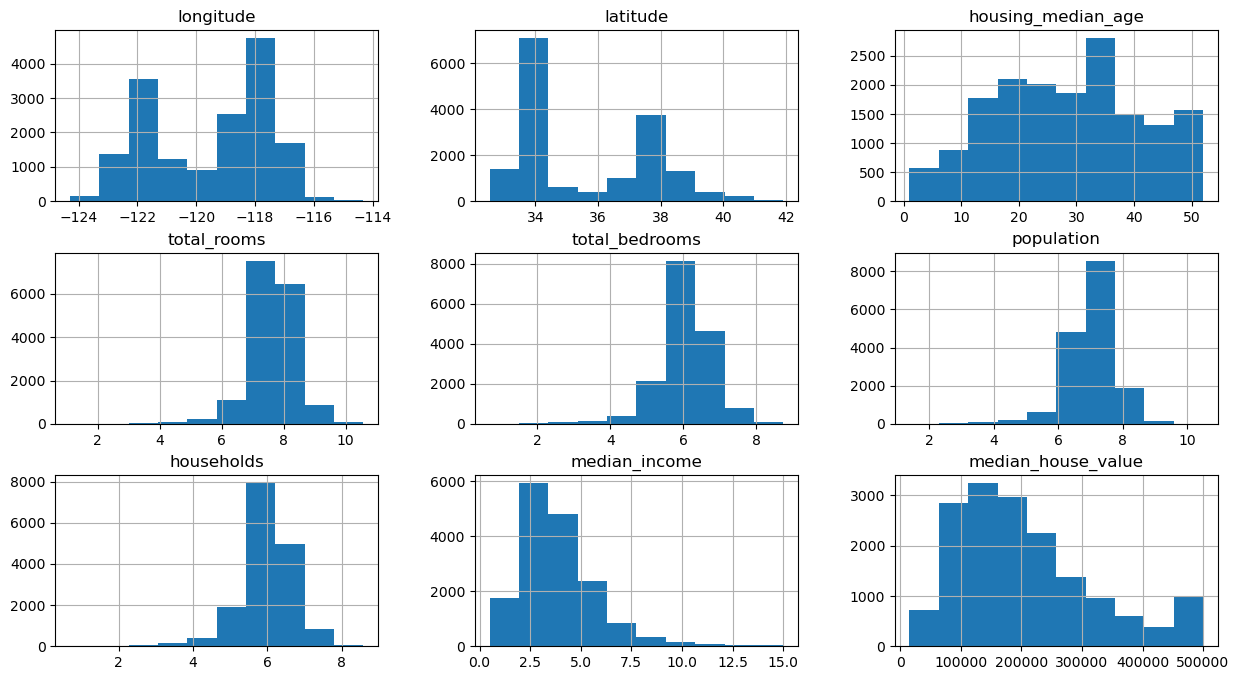

In [12]:
training_data.hist(figsize = (15,8))

In [13]:
training_data=training_data.join(pd.get_dummies(training_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [14]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5521,-118.39,33.96,45.0,7.216709,5.533389,6.366470,5.575949,5.8143,340700.0,1,0,0,0,0
17446,-120.48,34.65,26.0,7.567346,5.758902,6.909753,5.768321,4.4628,134400.0,0,0,0,0,1
2289,-119.76,36.80,29.0,8.159089,6.496775,7.485492,6.424869,2.5893,70900.0,0,1,0,0,0
8762,-118.36,33.81,34.0,7.701652,6.220590,7.015712,6.192362,4.7026,356800.0,1,0,0,0,0
1894,-120.01,38.92,25.0,7.472501,5.880533,6.536692,5.631212,2.6750,104200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,-117.18,32.69,48.0,7.924796,6.198479,6.886532,6.109248,5.1249,432400.0,0,0,0,0,1
20382,-118.85,34.14,16.0,8.321178,6.298949,7.251345,6.329721,8.1064,423400.0,1,0,0,0,0
9382,-122.45,37.91,27.0,7.894691,5.948035,6.841615,5.913503,10.0791,500001.0,0,0,0,1,0
14320,-117.15,32.70,50.0,6.165418,5.153292,6.182085,4.795791,1.3657,162500.0,0,0,0,0,1


<Axes: xlabel='latitude', ylabel='longitude'>

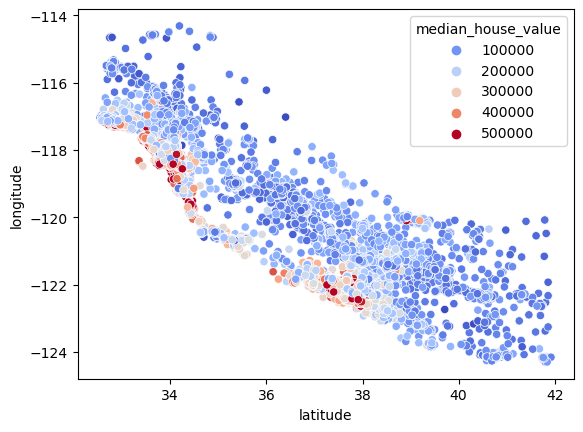

In [15]:
ChaChing.scatterplot(x='latitude',y='longitude',data=training_data,hue='median_house_value',palette='coolwarm')

It appears that houses that are located closer to the coast (left side, this is basically a heat map of the state of california)are more expensive than their inland counterparts

In [16]:
training_data['bedroom_ratio']=training_data['total_bedrooms']/training_data['total_rooms']

In [17]:
training_data['household_rooms']=training_data['total_rooms']/training_data['households']

<Axes: >

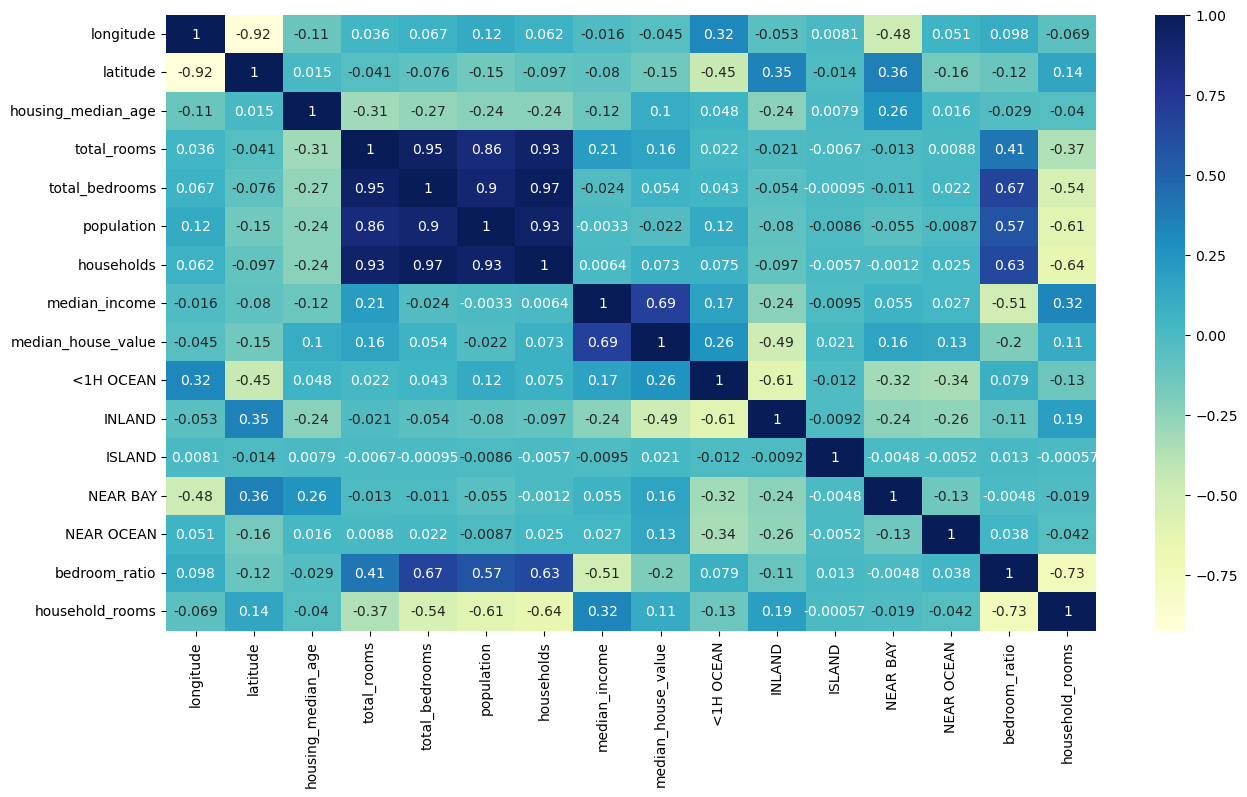

In [18]:
plt.figure(figsize = (15,8))
ChaChing.heatmap(training_data.corr(),annot=True,cmap='YlGnBu')

there is a negative correlation between bedroom ratio and the medium house value, look above to see what bedroom ratio consists of


In [19]:
from sklearn.linear_model import LinearRegression

X_train,y_train = training_data.drop(['median_house_value'],axis=1),training_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [20]:
testD = X_test.join(y_test)

testD['total_rooms'] = np.log(testD['total_rooms']+1)
testD['total_bedrooms'] = np.log(testD['total_bedrooms']+1)
testD['population'] = np.log(testD['population']+1)
testD['households'] = np.log(testD['households']+1)

In [21]:
testD=testD.join(pd.get_dummies(testD.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [22]:
testD['bedroom_ratio']=testD['total_bedrooms']/testD['total_rooms']

In [23]:
testD['household_rooms']=testD['total_rooms']/testD['households']

In [24]:
X_test,y_test = testD.drop(['median_house_value'],axis=1),testD['median_house_value']

In [25]:
testD

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10146,-117.92,33.92,19.0,7.687997,5.993961,7.149132,5.823046,5.1952,302100.0,1,0,0,0,0,0.779652,1.320271
16809,-122.41,37.66,44.0,6.068426,5.278115,6.526495,5.361292,3.2833,233300.0,0,0,0,0,1,0.869767,1.131896
12228,-116.90,33.74,14.0,7.732808,6.056784,6.796824,6.066108,2.3712,127900.0,0,1,0,0,0,0.783258,1.274756
822,-122.06,37.63,23.0,7.570443,5.877736,6.735780,5.899897,3.3611,169200.0,0,0,0,1,0,0.776406,1.283148
8301,-118.13,33.76,46.0,7.949797,6.513230,7.069874,6.508769,4.7875,363800.0,0,0,0,0,1,0.819295,1.221398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-122.26,37.85,52.0,7.880048,6.440947,7.100852,6.431331,1.9167,159200.0,0,0,0,1,0,0.817374,1.225259
2845,-118.96,35.40,28.0,8.448486,6.775366,7.785305,6.735780,3.2325,89000.0,0,1,0,0,0,0.801962,1.254270
16909,-122.36,37.57,35.0,7.481556,5.327876,6.378426,5.337538,10.7339,500001.0,0,0,0,0,1,0.712135,1.401687
15212,-117.09,32.98,23.0,7.026427,5.613128,6.533789,5.733341,2.3182,268800.0,1,0,0,0,0,0.798860,1.225538


In [26]:
reg.score(X_test,y_test)

0.688035654541397

In [27]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5521,-118.39,33.96,45.0,7.216709,5.533389,6.366470,5.575949,5.8143,1,0,0,0,0,0.766747,1.294257
17446,-120.48,34.65,26.0,7.567346,5.758902,6.909753,5.768321,4.4628,0,0,0,0,1,0.761020,1.311880
2289,-119.76,36.80,29.0,8.159089,6.496775,7.485492,6.424869,2.5893,0,1,0,0,0,0.796262,1.269923
8762,-118.36,33.81,34.0,7.701652,6.220590,7.015712,6.192362,4.7026,1,0,0,0,0,0.807696,1.243734
1894,-120.01,38.92,25.0,7.472501,5.880533,6.536692,5.631212,2.6750,0,1,0,0,0,0.786956,1.326979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,-117.18,32.69,48.0,7.924796,6.198479,6.886532,6.109248,5.1249,0,0,0,0,1,0.782163,1.297180
20382,-118.85,34.14,16.0,8.321178,6.298949,7.251345,6.329721,8.1064,1,0,0,0,0,0.756978,1.314620
9382,-122.45,37.91,27.0,7.894691,5.948035,6.841615,5.913503,10.0791,0,0,0,1,0,0.753422,1.335028
14320,-117.15,32.70,50.0,6.165418,5.153292,6.182085,4.795791,1.3657,0,0,0,0,1,0.835838,1.285589


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test_s,y_test)

0.8309336863994816